In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
'''
### OLD FEATURES: Foot, Kick Direction, Keep

path = '/content/drive/MyDrive/IW_Seminar/IW_final/penalty_kick_old_features.csv'
penalty_kick_dataset = pd.read_csv(path, encoding = ('ISO-8859-1'), low_memory = False)
penalty_kick_dataset
'''

"\n### OLD FEATURES: Foot, Kick Direction, Keep\n\npath = '/content/drive/MyDrive/IW_Seminar/IW_final/penalty_kick_old_features.csv'\npenalty_kick_dataset = pd.read_csv(path, encoding = ('ISO-8859-1'), low_memory = False)\npenalty_kick_dataset\n"

In [ ]:

### JUST PLACEMENT
path = '/content/drive/MyDrive/IW_Seminar/IW_final/no_power_penalty_kick_new_features.csv'
penalty_kick_dataset = premier_dataset = pd.read_csv(path, encoding = ('ISO-8859-1'), low_memory = False)
penalty_kick_dataset


,Foot,Kick Direction,Keeper Direction,Placement,Goal
0,L,R,R,1,1
1,R,R,R,0,0
2,R,R,L,1,1
3,R,R,R,1,0
4,R,R,R,1,1
...,...,...,...,...,...
506,R,L,R,1,1
507,R,R,R,1,1
508,R,L,R,1,1
509,R,L,L,0,0


In [ ]:
penalty_kick_target = penalty_kick_dataset[['Goal']].copy()
# penalty_kick_features = pd.get_dummies(penalty_kick_dataset, columns = ['Foot', 'Kick Direction', 'Keeper Direction', 'Placement', 'Power'])
#penalty_kick_features = pd.get_dummies(penalty_kick_dataset, columns = ['Foot', 'Kick Direction', 'Keeper Direction'])
# penalty_kick_features

ohe = OneHotEncoder(sparse_output = False)


dominant_foot = ohe.fit_transform(penalty_kick_dataset[['Foot']])
kick_direction = ohe.fit_transform(penalty_kick_dataset[['Kick Direction']])
keeper_direction = ohe.fit_transform(penalty_kick_dataset[['Keeper Direction']])

penalty_kick_np = np.zeros((len(penalty_kick_dataset),9))
penalty_kick_np[:,0:2] = dominant_foot
penalty_kick_np[:,2:5] = kick_direction
penalty_kick_np[:,5:8] = keeper_direction
penalty_kick_np[:,8:9] = penalty_kick_dataset[['Placement']].values
print(penalty_kick_np)

[[1. 0. 0. ... 0. 1. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [0. 1. 0. ... 0. 1. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 1. 1.]]


In [ ]:
'''
### PLACEMENT AND POWER FEATURES
path = '/content/drive/MyDrive/IW_Seminar/IW_final/penalty_kick_new_features.csv'
penalty_kick_dataset = premier_dataset = pd.read_csv(path, encoding = ('ISO-8859-1'), low_memory = False)
penalty_kick_dataset
'''

"\n### PLACEMENT AND POWER FEATURES\npath = '/content/drive/MyDrive/IW_Seminar/IW_final/penalty_kick_new_features.csv'\npenalty_kick_dataset = premier_dataset = pd.read_csv(path, encoding = ('ISO-8859-1'), low_memory = False)\npenalty_kick_dataset\n"

In [ ]:
'''
penalty_kick_target = penalty_kick_dataset[['Goal']].copy()
# penalty_kick_features = pd.get_dummies(penalty_kick_dataset, columns = ['Foot', 'Kick Direction', 'Keeper Direction', 'Placement', 'Power'])
#penalty_kick_features = pd.get_dummies(penalty_kick_dataset, columns = ['Foot', 'Kick Direction', 'Keeper Direction'])
# penalty_kick_features

ohe = OneHotEncoder(sparse_output = False)


dominant_foot = ohe.fit_transform(penalty_kick_dataset[['Foot']])
kick_direction = ohe.fit_transform(penalty_kick_dataset[['Kick Direction']])
keeper_direction = ohe.fit_transform(penalty_kick_dataset[['Keeper Direction']])

penalty_kick_np = np.zeros((len(penalty_kick_dataset),8))
penalty_kick_np[:,0:2] = dominant_foot
penalty_kick_np[:,2:5] = kick_direction
penalty_kick_np[:,5:8] = keeper_direction
print(penalty_kick_np)
'''

"\npenalty_kick_target = penalty_kick_dataset[['Goal']].copy()\n# penalty_kick_features = pd.get_dummies(penalty_kick_dataset, columns = ['Foot', 'Kick Direction', 'Keeper Direction', 'Placement', 'Power'])\n#penalty_kick_features = pd.get_dummies(penalty_kick_dataset, columns = ['Foot', 'Kick Direction', 'Keeper Direction'])\n# penalty_kick_features\n\nohe = OneHotEncoder(sparse_output = False)\n\n\ndominant_foot = ohe.fit_transform(penalty_kick_dataset[['Foot']])\nkick_direction = ohe.fit_transform(penalty_kick_dataset[['Kick Direction']])\nkeeper_direction = ohe.fit_transform(penalty_kick_dataset[['Keeper Direction']])\n\npenalty_kick_np = np.zeros((len(penalty_kick_dataset),8))\npenalty_kick_np[:,0:2] = dominant_foot\npenalty_kick_np[:,2:5] = kick_direction\npenalty_kick_np[:,5:8] = keeper_direction\nprint(penalty_kick_np)\n"

In [ ]:
penalty_kick_features_df = pd.DataFrame({'Left Footed': penalty_kick_np[:,0], 'Right Footed': penalty_kick_np[:,1], 'Kicked Left': penalty_kick_np[:,2], 'Kicked Center': penalty_kick_np[:,3], 'Kicked Right': penalty_kick_np[:,4] , 'Keeper Left': penalty_kick_np[:,5], 'Keeper Center': penalty_kick_np[:,6], 'Keeper Right': penalty_kick_np[:,7], 'Placement': penalty_kick_np[:,8]})
penalty_kick_features_df

,Left Footed,Right Footed,Kicked Left,Kicked Center,Kicked Right,Keeper Left,Keeper Center,Keeper Right,Placement
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
506,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
507,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
508,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
509,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
penalty_kick_target

,Goal
0,1
1,0
2,1
3,0
4,1
...,...
506,1
507,1
508,1
509,0


In [ ]:
penalty_kick_target_np = penalty_kick_target.values.flatten()
print(penalty_kick_target_np)

[1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1
 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0
 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1
 0 1 0 0 0 1 1 1 1 1 1 0 

# In terms of how I will divide the training and testing data, what I have is training data, and my testing data will be data from an unseen event, such as Copa America penalty shootouts. Accuracy will be measured by how accurate the model predicted and comparing it to what actually happened.
# But for now, I will split the data using the 80% train, 20% test rule

In [ ]:
from sklearn.model_selection import train_test_split
x_main, x_test, y_main, y_test = train_test_split(penalty_kick_np,penalty_kick_target_np, test_size=0.20, random_state = 42, stratify = penalty_kick_target_np)
print('Length of x_main:', len(x_main))
print('Length of x_test:', len(x_test))
print('Length of y_main:', len(y_main))
print('Length of y_test:', len(y_test))

Length of x_main: 408
Length of x_test: 103
Length of y_main: 408
Length of y_test: 103


## Now I want to split train into validation and train

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size = 0.2, random_state = 42, stratify = y_main)
print('Length of x_train:', len(x_train))
print('Length of x_val:', len(x_val))
print('Length of y_train:', len(y_train))
print('Length of y_val:', len(y_val))

Length of x_train: 326
Length of x_val: 82
Length of y_train: 326
Length of y_val: 82


## Training Data Below

In [ ]:
x_train

array([[0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 1.],
       [0., 1., 1., ..., 0., 1., 1.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [ ]:
y_train
print(len(y_train))
print(np.sum(y_train))

326
199


## Performing EDA
### Imbalanced Dataset

In [ ]:
# num_pens_missed = target_penalty_df['Target'].value_counts()[0.0]
# num_pens_scored = target_penalty_df['Target'].value_counts()[1.0]
num_pens_scored = np.sum(y_train)
num_pens_missed = len(y_train) - num_pens_scored
print("Number of penalties missed is:", num_pens_missed)
print("Number of penalties scored is:", num_pens_scored)

Number of penalties missed is: 127
Number of penalties scored is: 199


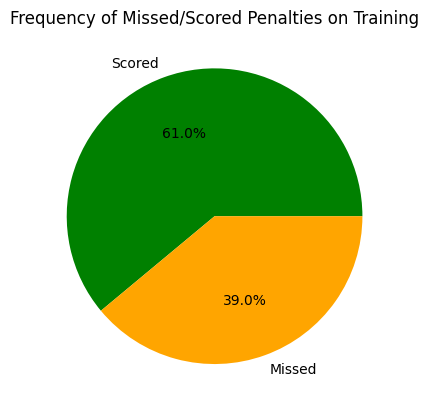

In [ ]:
import matplotlib.pyplot as plt

# Sample data
sizes = [num_pens_scored, num_pens_missed]
labels = ['Scored', 'Missed']
colors = ['green', 'orange']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

# Add a title
plt.title('Frequency of Missed/Scored Penalties on Training')

# Show the plot
plt.show()

# NOW SHOW HOW IMBALANCED THE DATASET IS

# Will Now Implement Random Oversampling

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# features_penalty_dataset is the FEATURES (x_train) of the training set
print("Original dataset shape:", Counter(y_train))

Original dataset shape: Counter({1: 199, 0: 127})


In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
x_over, y_over = oversample.fit_resample(x_train, y_train)
x_train_final = np.vstack((x_over,x_val))
y_train_final = np.concatenate((y_over,y_val))
print("Oversampled dataset shape:", Counter(y_over))

Oversampled dataset shape: Counter({1: 199, 0: 199})


# TRAIN ON SOME MODELS






In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## RANDOM CLASSIFIER
### Declare Random Classifier Object

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

### Base Model To Train & Test on Validation

The AUC-ROC score for Base Random Forest is: 0.69
The F1 score for Base Random Forest is : 0.8


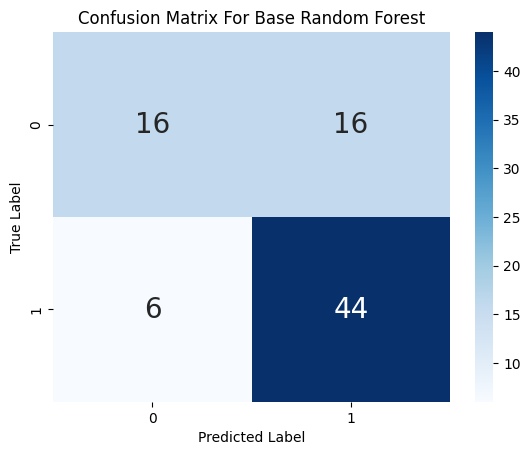

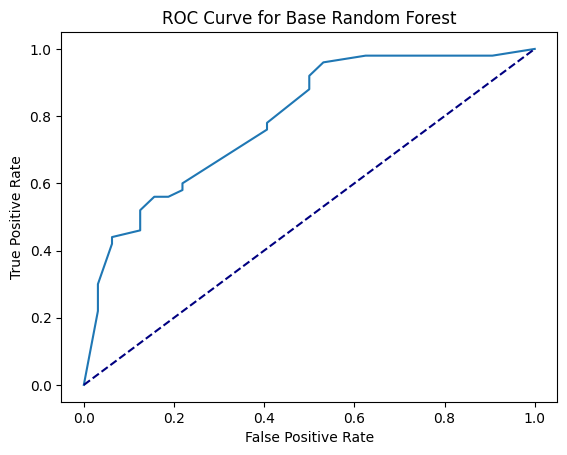

In [ ]:
#### TRAIN  & PREDICT ON OVERSAMPLED DATA
rfc.fit(x_over,y_over)
y_rfc_base = rfc.predict(x_val)

### EVALUATION
f1_rfc_base = f1_score(y_val, y_rfc_base)
roc_rfc_base = roc_auc_score(y_val, y_rfc_base)
print('The AUC-ROC score for Base Random Forest is:', roc_rfc_base)
print('The F1 score for Base Random Forest is :', f1_rfc_base)

### CONFUSION MATRIX

cm = confusion_matrix(y_val, y_rfc_base)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Base Random Forest")

# Show the plot
plt.show()

### ROC CURVE
y_pred_rfc_base_proba = rfc.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_rfc_base_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Base Random Forest')
plt.show()


### HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

The best parameters are: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
rfc parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
The AUC-ROC score for Random Forest After Tuning is: 0.6956249999999999
The F1 score for Random Forest Tree After Tuning is : 0.7962962962962963


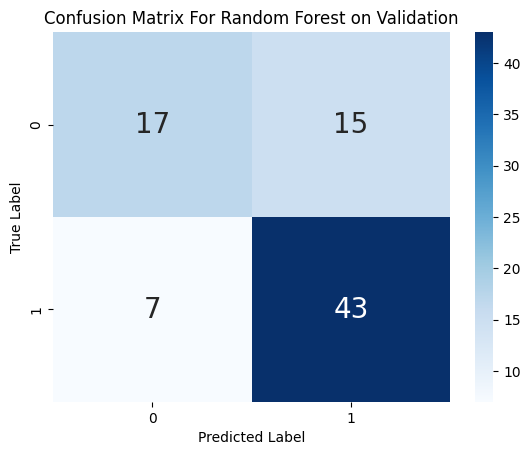

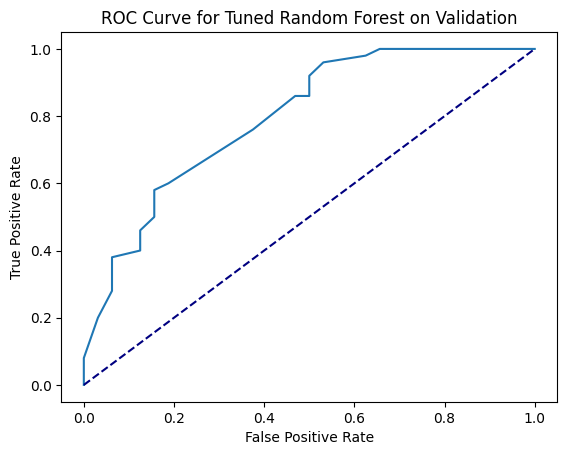

In [ ]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_over, y_over)


### GET THE BEST PARAMS
best_params = grid_search.best_params_
print('The best parameters are:', best_params)

### FIT & PREDICT BASED ON THE NEW PARAMS
rfc.set_params(random_state = 42, **best_params)
print('rfc parameters:', rfc.get_params())
rfc.fit(x_over, y_over)
y_rfc_grid = rfc.predict(x_val)

### EVALUATION

f1_rfc_grid = f1_score(y_val, y_rfc_grid)
roc_rfc_grid = roc_auc_score(y_val, y_rfc_grid)
print('The AUC-ROC score for Random Forest After Tuning is:', roc_rfc_grid)
print('The F1 score for Random Forest Tree After Tuning is :', f1_rfc_grid)

### CONFUSION MATRIX

cm = confusion_matrix(y_val, y_rfc_grid)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Random Forest on Validation")

# Show the plot
plt.show()

### ROC CURVE
y_pred_rfc_grid_proba = rfc.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_rfc_grid_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Tuned Random Forest on Validation')
plt.show()




### NOW USE THE TEST FOR FINAL EVALUATION

rfc parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
The AUC-ROC score for Random Forest After Tuning is: 0.6718253968253969
The F1 score for Random Forest Tree After Tuning is : 0.7633587786259542


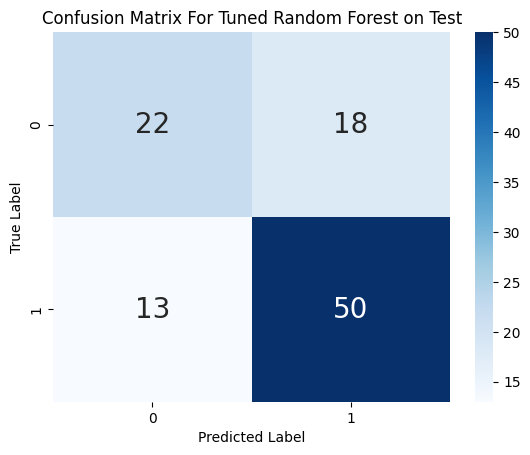

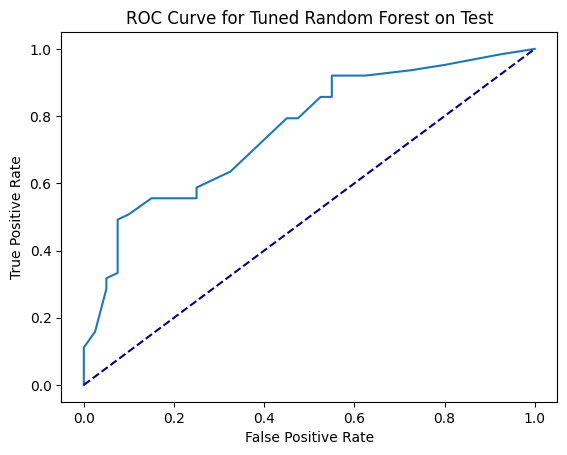

In [ ]:
rfc.fit(x_train_final, y_train_final)
print('rfc parameters:', rfc.get_params())
y_rfc_final_preds = rfc.predict(x_test)

### TEST EVALUATION

f1_rfc_grid_test = f1_score(y_test, y_rfc_final_preds)
roc_rfc_grid_test = roc_auc_score(y_test, y_rfc_final_preds)
print('The AUC-ROC score for Random Forest After Tuning is:', roc_rfc_grid_test)
print('The F1 score for Random Forest Tree After Tuning is :', f1_rfc_grid_test)

### CONFUSION MATRIX

cm = confusion_matrix(y_test, y_rfc_final_preds)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Tuned Random Forest on Test")

# Show the plot
plt.show()

### ROC CURVE
y_pred_rfc_grid_proba = rfc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rfc_grid_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Tuned Random Forest on Test')
plt.show()




# DECISION TREE MODEL

### Declare Decision Tree Object

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)

### NOW TRAIN ON MY BASE MODEL

The AUC-ROC score for Base Decision Tree is: 0.676875
The F1 score for Base Decision Tree is : 0.7524752475247525


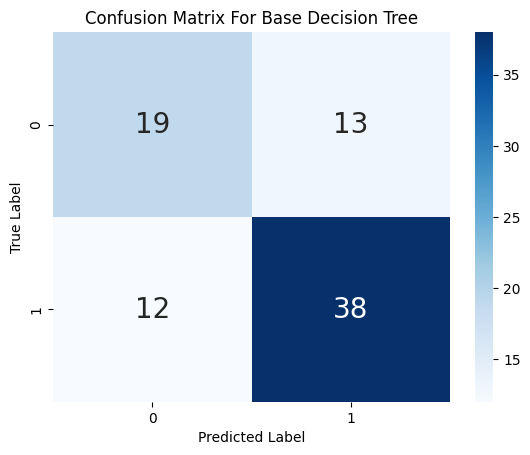

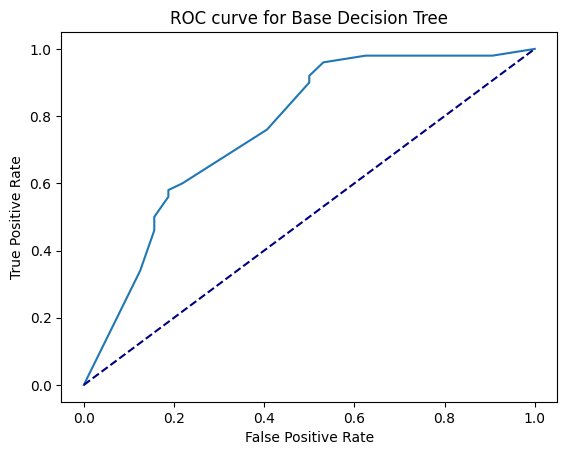

In [ ]:
### FIT AND MAKE PREDICTION
dtc.fit(x_over, y_over)
y_dtc_base = dtc.predict(x_val)

### EVALUATION
roc_dtc_base = roc_auc_score(y_val, y_dtc_base)
f1_dtc_base = f1_score(y_val, y_dtc_base)
print('The AUC-ROC score for Base Decision Tree is:', roc_dtc_base)
print('The F1 score for Base Decision Tree is :', f1_dtc_base)

### CONFUSION MATRIX
cm = confusion_matrix(y_val, y_dtc_base)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap = 'Blues', fmt="d", annot_kws={"size": 20})


# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Base Decision Tree")

# Show the plot
plt.show()

### ROC CURVE PLOT

y_dtc_base_proba = dtc.predict_proba(x_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_dtc_base_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve for Base Decision Tree')
plt.show()

### NOW TUNE HYPERPARAMETERS

The best parameters are: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
The parameters are: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
The AUC-ROC score for Decision Tree After Tuning is: 0.6925000000000001
The F1 score for Decision Tree After Tuning is : 0.76


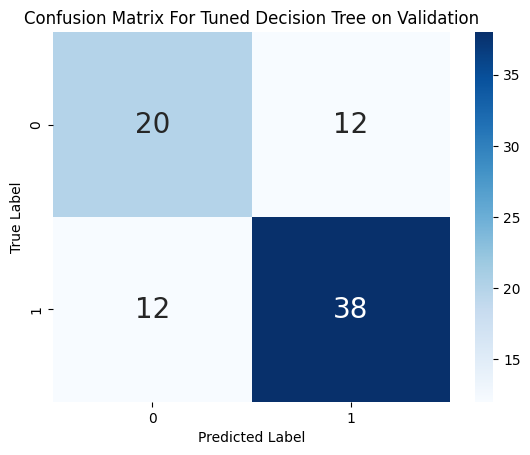

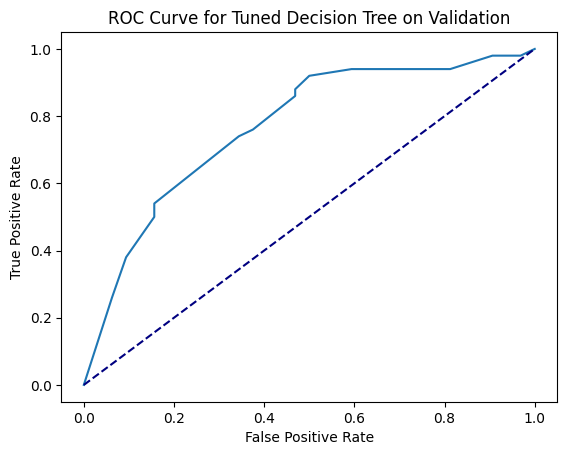

In [ ]:
# Define the parameter grid to search over
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a grid search object and fit on the training data
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_over, y_over)

### GET THE BEST PARAMS
best_params = grid_search.best_params_
print('The best parameters are:', best_params)

### FIT & PREDICT BASED ON THE NEW PARAMS
dtc.set_params(random_state = 42, **best_params)
print('The parameters are:', dtc.get_params())
dtc.fit(x_over, y_over)
y_dtc_grid = dtc.predict(x_val)

### EVALUATION

f1_dtc_grid = f1_score(y_val, y_dtc_grid)
roc_dtc_grid = roc_auc_score(y_val, y_dtc_grid)
print('The AUC-ROC score for Decision Tree After Tuning is:', roc_dtc_grid)
print('The F1 score for Decision Tree After Tuning is :', f1_dtc_grid)

### CONFUSION MATRIX

cm = confusion_matrix(y_val, y_dtc_grid)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Tuned Decision Tree on Validation")

# Show the plot
plt.show()

### ROC CURVE
y_pred_dtc_grid_proba = dtc.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_dtc_grid_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Tuned Decision Tree on Validation')
plt.show()



### NOW EVALUATE ON TEST DATASET

The parameters are: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
The AUC-ROC score for Decision Tree on Test: 0.6275793650793651
The F1 score for Decision Tree on Test : 0.7187500000000001


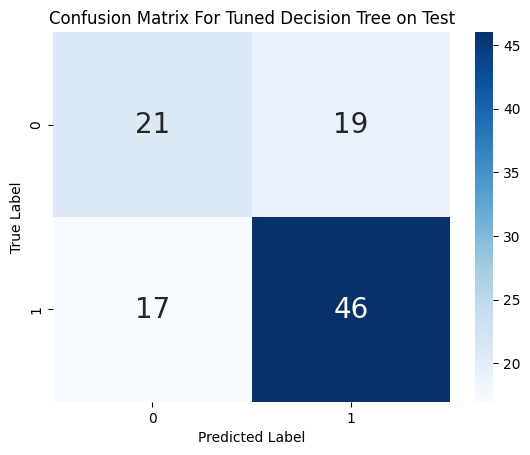

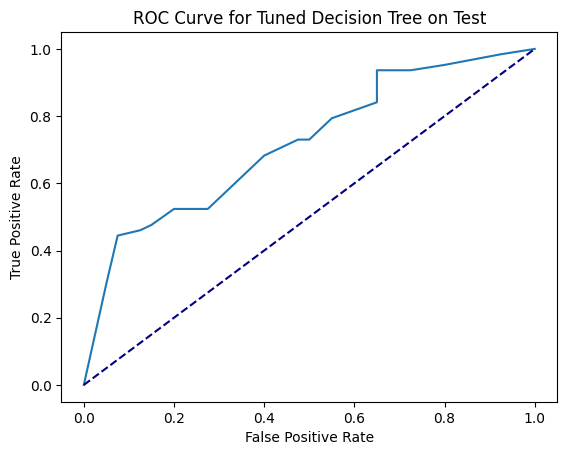

In [ ]:
print('The parameters are:', dtc.get_params())
dtc.fit(x_train_final, y_train_final)
y_dtc_final_preds = dtc.predict(x_test)

### TEST EVALUATION

f1_dtc_grid_test = f1_score(y_test, y_dtc_final_preds)
roc_dtc_grid_test = roc_auc_score(y_test, y_dtc_final_preds)
print('The AUC-ROC score for Decision Tree on Test:', roc_dtc_grid_test)
print('The F1 score for Decision Tree on Test :', f1_dtc_grid_test)

### CONFUSION MATRIX

cm = confusion_matrix(y_test, y_dtc_final_preds)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Tuned Decision Tree on Test")

# Show the plot
plt.show()

### ROC CURVE
y_pred_dtc_grid_proba = dtc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_dtc_grid_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Tuned Decision Tree on Test')
plt.show()


# LOGISTIC REGRESSION

### DECLARE LOGISTIC REGRESSION OBJECT

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

### BASE MODEL

The AUC-ROC score for Base Logistic Regresion is: 0.68125
The F1 score for Base Logistic Regression is: 0.7692307692307692


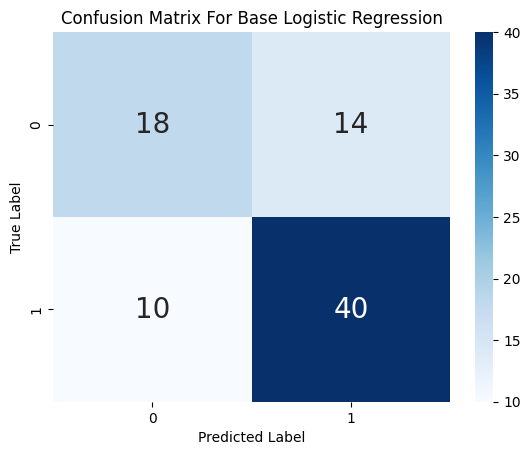

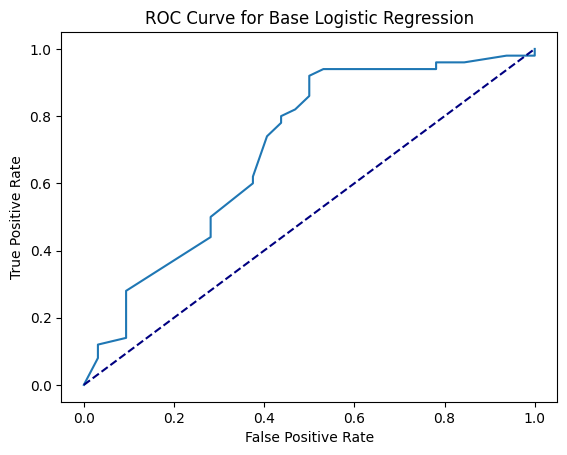

In [ ]:
### TRAIN & PREDICT
lr.fit(x_over, y_over)
y_lr_base = lr.predict(x_val)

### EVALUATE
roc_lr_base = roc_auc_score(y_val, y_lr_base)
f1_lr_base = f1_score(y_val, y_lr_base)
print('The AUC-ROC score for Base Logistic Regresion is:', roc_lr_base)
print('The F1 score for Base Logistic Regression is:', f1_lr_base)

cm = confusion_matrix(y_val, y_lr_base)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap = 'Blues' ,fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Base Logistic Regression")

# Show the plot
plt.show()

## ROC CURVE

y_lr_base_proba = lr.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_lr_base_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Base Logistic Regression')
plt.show()

### HYPERPARAMETER TUNING

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

The best parameters are: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
The AUC-ROC score for Logistic Regression After Tuning is: 0.68125
The F1 score for Logistic Regression After Tuning is : 0.7692307692307692


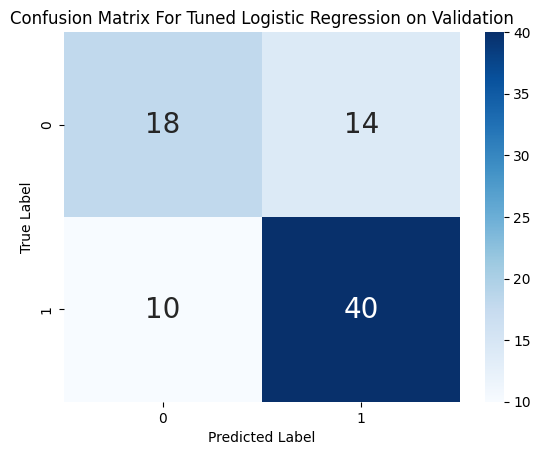

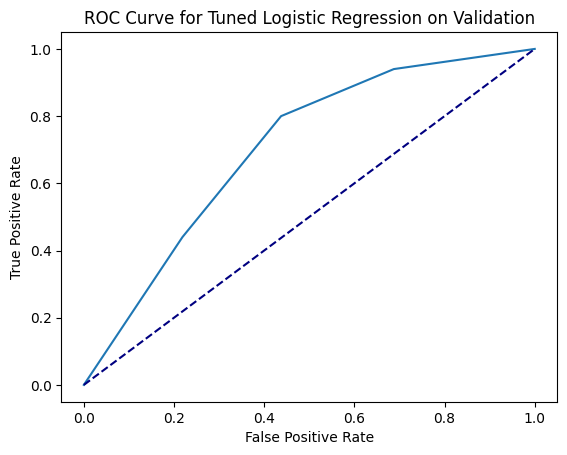

In [ ]:
# Define the parameter grid to search over
# Define the hyperparameters to search over
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


# Create a grid search object
# Create GridSearchCV object
grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring='f1', n_jobs = -1)
# grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5, scoring=['f1', 'roc_auc'], refit = 'f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_over, y_over)


### GET THE BEST PARAMS
best_params = grid_search.best_params_
print('The best parameters are:', best_params)

### FIT & PREDICT BASED ON THE NEW PARAMS
lr.set_params(random_state = 42, **best_params)
lr.fit(x_over, y_over)
y_lr_grid = lr.predict(x_val)

### EVALUATION

f1_lr_grid = f1_score(y_val, y_lr_grid)
roc_lr_grid = roc_auc_score(y_val, y_lr_grid)
print('The AUC-ROC score for Logistic Regression After Tuning is:', roc_lr_grid)
print('The F1 score for Logistic Regression After Tuning is :', f1_lr_grid)

### CONFUSION MATRIX

cm = confusion_matrix(y_val, y_lr_grid)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Tuned Logistic Regression on Validation")

# Show the plot
plt.show()

### ROC CURVE
y_pred_lr_grid_proba = lr.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_lr_grid_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Tuned Logistic Regression on Validation')
plt.show()



### NOW ON THE TEST DATASET

The AUC-ROC score for Logistic Regression on Test is: 0.6843253968253967
The F1 score for Logistic Regression on Test is : 0.7692307692307693


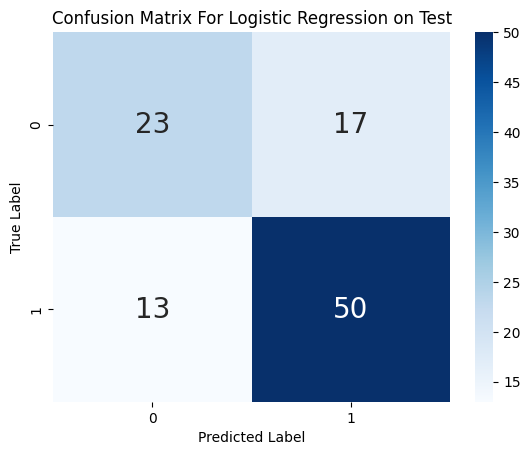

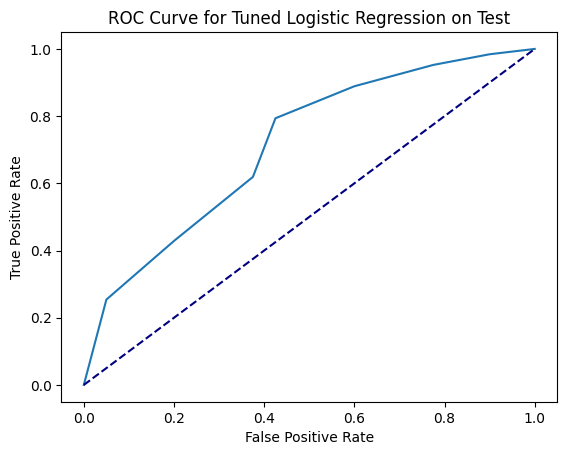

In [ ]:
lr.fit(x_train_final, y_train_final)
y_lr_final_preds = lr.predict(x_test)

### TEST EVALUATION

f1_lr_grid_test = f1_score(y_test, y_lr_final_preds)
roc_lr_grid_test = roc_auc_score(y_test, y_lr_final_preds)
print('The AUC-ROC score for Logistic Regression on Test is:', roc_lr_grid_test)
print('The F1 score for Logistic Regression on Test is :', f1_lr_grid_test)

### CONFUSION MATRIX

cm = confusion_matrix(y_test, y_lr_final_preds)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Logistic Regression on Test")

# Show the plot
plt.show()

### ROC CURVE
y_pred_lr_grid_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_lr_grid_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Tuned Logistic Regression on Test')
plt.show()


# GRADIENT BOOSTING

### DECLARE GRADIENT BOOSTING OBJECT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# create the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

### BASE MODEL

The AUC-ROC score for Base Gradient Boosting is: 0.6925000000000001
The F1 score for Base Gradient Boosting is: 0.76


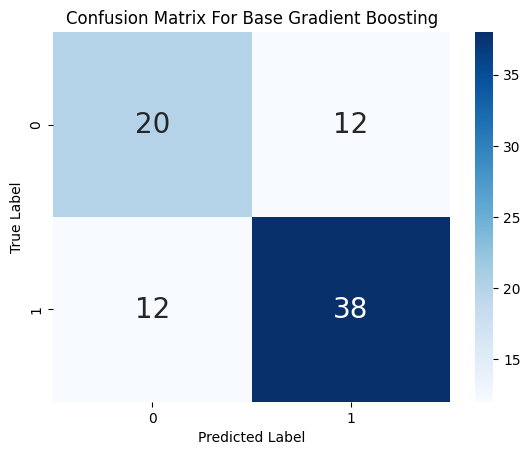

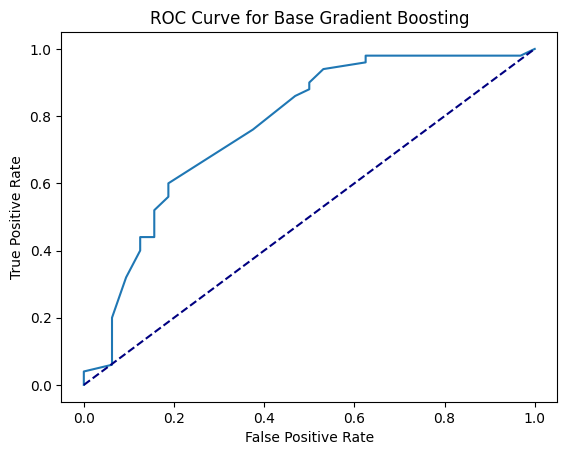

In [ ]:
### TRAIN & PREDICT THE MODEL
gb.fit(x_over, y_over)
y_pred_gb = gb.predict(x_val)

### EVALUATION
roc_gb_base = roc_auc_score(y_val, y_pred_gb)
f1_gb_base = f1_score(y_val, y_pred_gb)
print('The AUC-ROC score for Base Gradient Boosting is:', roc_gb_base)
print('The F1 score for Base Gradient Boosting is:', f1_gb_base)

# print("Accuracy:", accuracy)
cm = confusion_matrix(y_val, y_pred_gb)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Base Gradient Boosting")

# Show the plot
plt.show()

### ROC CURVE
#define metrics
y_gb_base_proba = gb.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_gb_base_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Base Gradient Boosting')
plt.show()

### HYPERPARAMETER TUNING GRADIENT BOOSTING

The best parameters are: {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 300}
The AUC-ROC score for Gradient Boosting After Tuning is: 0.6956249999999999
The F1 score for Gradient Booting After Tuning is : 0.7962962962962963


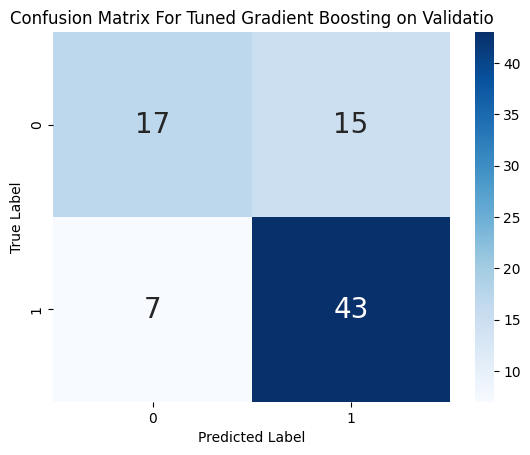

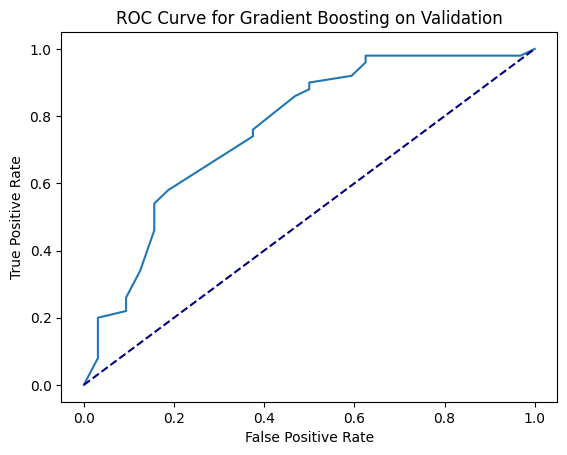

In [ ]:
# Define parameter grid for GridSearchCV
param_grid = {'learning_rate': [0.001, 0.01,0.01, 0.1, 1], 'n_estimators': [50, 100, 200,250,300], 'max_depth': [2, 3, 4,5,6]}

# Define GridSearchCV object with Gradient Boosting model and parameter grid
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring = 'f1', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_over, y_over)

### GET THE BEST PARAMS
best_params = grid_search.best_params_
print('The best parameters are:', best_params)

### FIT & PREDICT BASED ON THE NEW PARAMS
gb.set_params(random_state = 42, **best_params)
gb.fit(x_over, y_over)
y_gb_grid = gb.predict(x_val)

### EVALUATION

f1_gb_grid = f1_score(y_val, y_gb_grid)
roc_gb_grid = roc_auc_score(y_val, y_gb_grid)
print('The AUC-ROC score for Gradient Boosting After Tuning is:', roc_gb_grid)
print('The F1 score for Gradient Booting After Tuning is :', f1_gb_grid)

### CONFUSION MATRIX

cm = confusion_matrix(y_val, y_gb_grid)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Tuned Gradient Boosting on Validatio")

# Show the plot
plt.show()

### ROC CURVE
y_gb_grid_proba = gb.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_gb_grid_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Gradient Boosting on Validation')
plt.show()


### ON THE TEST

The AUC-ROC score for Gradient Boosting After Tuning is: 0.6593253968253968
The F1 score for Gradient Boosting After Tuning is : 0.7575757575757576


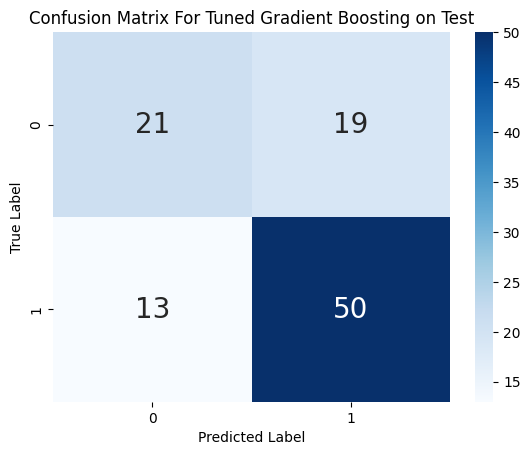

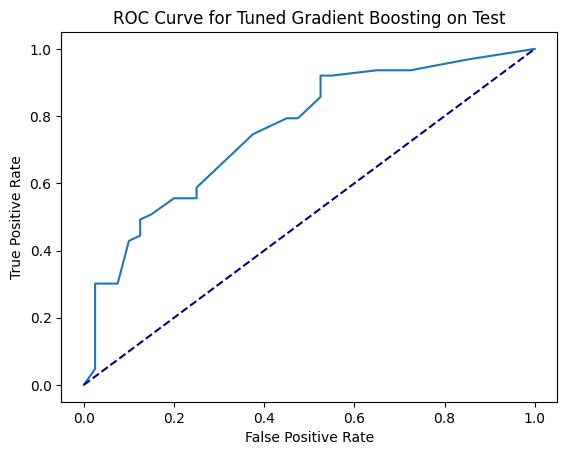

In [ ]:
gb.fit(x_train_final, y_train_final)
y_gb_final_preds = gb.predict(x_test)

### TEST EVALUATION

f1_gb_grid_test = f1_score(y_test, y_gb_final_preds)
roc_gb_grid_test = roc_auc_score(y_test, y_gb_final_preds)
print('The AUC-ROC score for Gradient Boosting After Tuning is:', roc_gb_grid_test)
print('The F1 score for Gradient Boosting After Tuning is :', f1_gb_grid_test)

### CONFUSION MATRIX

cm = confusion_matrix(y_test, y_gb_final_preds)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Tuned Gradient Boosting on Test")

# Show the plot
plt.show()

### ROC CURVE
y_pred_gb_grid_proba = gb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_gb_grid_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Tuned Gradient Boosting on Test')
plt.show()



# SVC

### SVC Instance

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state=42, probability = True)

### BASE MODEL

The AUC-ROC score for SVM is: 0.6925000000000001
The F1 score for SVM is: 0.76


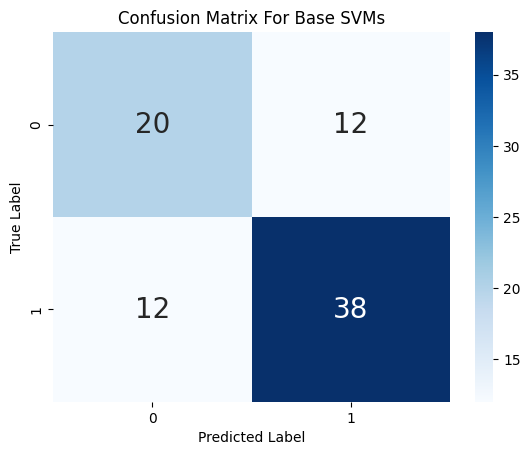

In [ ]:
# Train, Fit, and Predict
svc.fit(x_over, y_over)

# predict the outcomes of the penalty kicks using the trained model
y_svm_base = svc.predict(x_val)

# Evaluation Metrics
roc_svm_base = roc_auc_score(y_val, y_svm_base)
f1_svm_base = f1_score(y_val, y_svm_base)
print('The AUC-ROC score for SVM is:', roc_svm_base)
print('The F1 score for SVM is:', f1_svm_base)
cm = confusion_matrix(y_val, y_svm_base)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Base SVMs")

# Show the plot
plt.show()

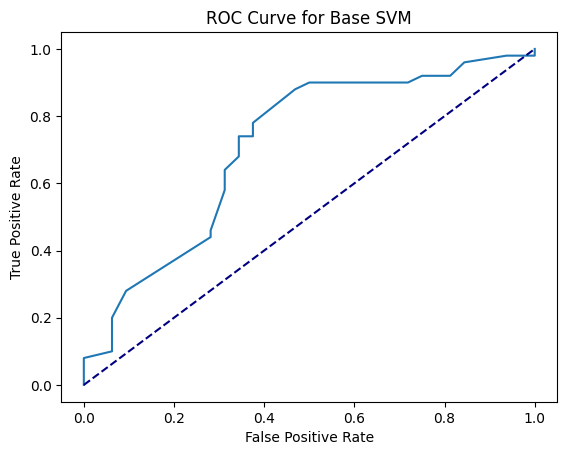

In [ ]:
#define metrics
y_pred_svm_base_proba = svc.predict_proba(x_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_svm_base_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('ROC Curve for Base SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### TUNE THE HYPERPARAMETERS

The best parameters are: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
rfc parameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 10, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
The AUC-ROC score for Random Forest After Tuning is: 0.7
The F1 score for Random Forest Tree After Tuning is : 0.8108108108108109


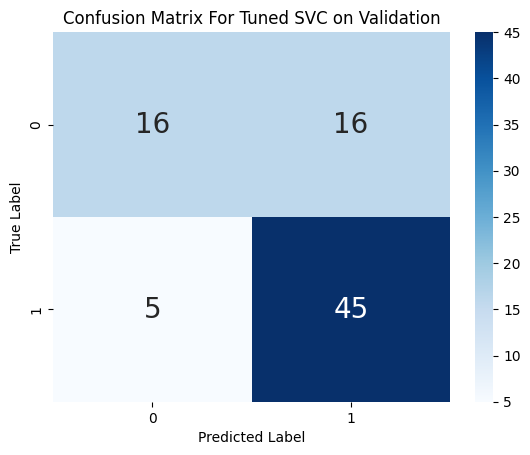

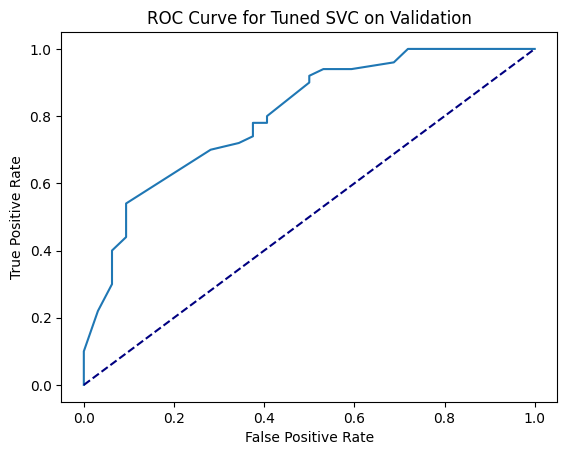

In [ ]:
# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(x_over, y_over)


### GET THE BEST PARAMS
best_params = grid_search.best_params_
print('The best parameters are:', best_params)

### FIT & PREDICT BASED ON THE NEW PARAMS
svc.set_params(random_state = 42, **best_params)
print('rfc parameters:', svc.get_params())
svc.fit(x_over, y_over)
y_svm_grid = svc.predict(x_val)

### EVALUATION

f1_svm_grid = f1_score(y_val, y_svm_grid)
roc_svm_grid = roc_auc_score(y_val, y_svm_grid)
print('The AUC-ROC score for Random Forest After Tuning is:', roc_svm_grid)
print('The F1 score for Random Forest Tree After Tuning is :', f1_svm_grid)

### CONFUSION MATRIX

cm = confusion_matrix(y_val, y_svm_grid)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Tuned SVC on Validation")

# Show the plot
plt.show()

### ROC CURVE
y_pred_svm_grid_proba = svc.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_svm_grid_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Tuned SVC on Validation')
plt.show()


### NOW WITH THE TEST

The AUC-ROC score for Random Forest After Tuning is: 0.6593253968253968
The F1 score for Random Forest Tree After Tuning is : 0.7575757575757576


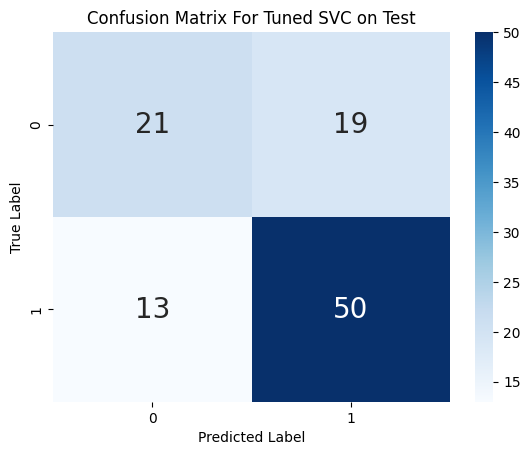

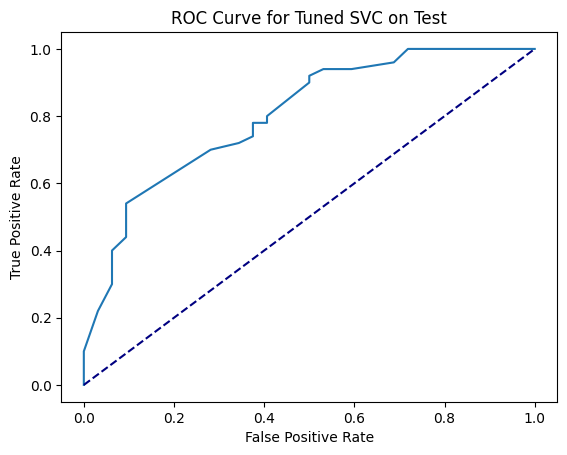

In [ ]:
svc.fit(x_over, y_over)
y_svm_test = svc.predict(x_test)

### EVALUATION

f1_svm_test = f1_score(y_test, y_svm_test)
roc_svm_test = roc_auc_score(y_test, y_svm_test)
print('The AUC-ROC score for Random Forest After Tuning is:', roc_svm_test)
print('The F1 score for Random Forest Tree After Tuning is :', f1_svm_test)

### CONFUSION MATRIX

cm = confusion_matrix(y_test, y_svm_test)

# Create heatmap of confusion matrix using seaborn
sns.heatmap(cm, annot=True,cmap = 'Blues', fmt="d", annot_kws={"size": 20})

# Set plot labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Tuned SVC on Test")

# Show the plot
plt.show()

### ROC CURVE
y_pred_svm_test_proba = svc.predict_proba(x_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_svm_test_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for Tuned SVC on Test')
plt.show()


# BAR GRAPH TO SHOW METRICS

[0.676875, 0.69, 0.68125, 0.6925000000000001, 0.6925000000000001]
[0.7524752475247525, 0.8, 0.7692307692307692, 0.76, 0.76]


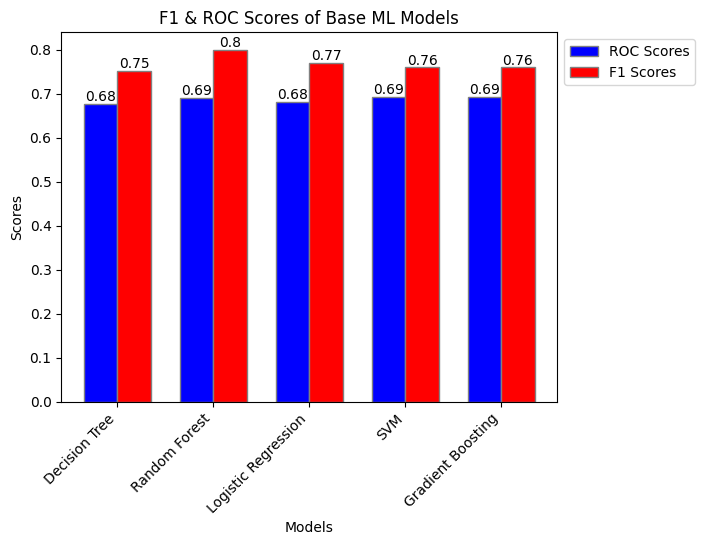

In [ ]:
'''
DECISION TREE
roc_dtc_base = roc_auc_score(y_test, y_pred_dtc_base)
f1_dtc_base = f1_score(y_test, y_pred_dtc_base)
print('The AUC-ROC score for Decision Tree is:', roc_dtc_base)
print('The F1 score for Decision Tree is :', f1_dtc_base)

RANDOM FOREST

roc_rfc_base = roc_auc_score(y_test, y_pred_rfc_base)
f1_rfc_base = f1_score(y_test, y_pred_rfc_base)
print('The AUC-ROC score for Random Forest is:', roc_rfc_base)
print('The F1 score for Decision Tree is :', f1_rfc_base)

LOGISTIC REGRESSION

roc_lr_base = roc_auc_score(y_test, y_pred_lr_base)
f1_lr_base = f1_score(y_test, y_pred_lr_base)

SVM

roc_svm_base = roc_auc_score(y_test, y_pred_svm_base)
f1_svm_base = f1_score(y_test, y_pred_svm_base)


GRADIENT BOOST

roc_gb_base = roc_auc_score(y_test, y_pred_gb_base)
f1_gb_base = f1_score(y_test, y_pred_gb_base)

'''
import matplotlib.pyplot as plt
import numpy as np
'''

'''

# Sample data
labels = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting']
men_means = [roc_dtc_base, roc_rfc_base, roc_lr_base, roc_svm_base, roc_gb_base]
women_means = [f1_dtc_base, f1_rfc_base, f1_lr_base, f1_svm_base, f1_gb_base]

print(men_means)
print(women_means)

# Set the bar width
bar_width = 0.35

# X-axis positions of bars
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, men_means, color='b', width=bar_width, edgecolor='grey', label='ROC Scores')
plt.bar(r2, women_means, color='r', width=bar_width, edgecolor='grey', label='F1 Scores')

# Add values
# Display the actual values on the bars for Series 1
for i, value in enumerate(men_means):
    plt.text(i, value + 0.0, str(np.round(value,2)), ha='center', va='bottom')

# Display the actual values on the bars for Series 2
for i, value in enumerate(women_means):
    plt.text(i + bar_width, value + 0.0, str(np.round(value,2)), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels, rotation=45, ha='right')
plt.title('F1 & ROC Scores of Base ML Models')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

[0.6275793650793651, 0.6718253968253969, 0.6843253968253967, 0.6593253968253968, 0.6593253968253968]
[0.7187500000000001, 0.7633587786259542, 0.7692307692307693, 0.7575757575757576, 0.7575757575757576]


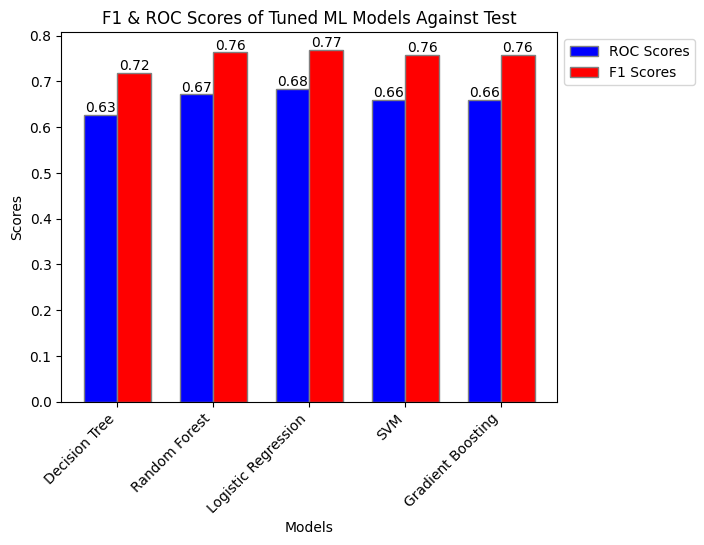

In [ ]:
# Sample data
labels = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting']
men_means = [roc_dtc_grid_test, roc_rfc_grid_test, roc_lr_grid_test, roc_svm_test, roc_gb_grid_test]
women_means = [f1_dtc_grid_test, f1_rfc_grid_test, f1_lr_grid_test, f1_svm_test, f1_gb_grid_test]

print(men_means)
print(women_means)

# Set the bar width
bar_width = 0.35

# X-axis positions of bars
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, men_means, color='b', width=bar_width, edgecolor='grey', label='ROC Scores')
plt.bar(r2, women_means, color='r', width=bar_width, edgecolor='grey', label='F1 Scores')

# Add values
# Display the actual values on the bars for Series 1
for i, value in enumerate(men_means):
    plt.text(i, value + 0.0, str(np.round(value,2)), ha='center', va='bottom')

# Display the actual values on the bars for Series 2
for i, value in enumerate(women_means):
    plt.text(i + bar_width, value + 0.0, str(np.round(value,2)), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels, rotation=45, ha='right')
plt.title('F1 & ROC Scores of Tuned ML Models Against Test')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

# GRAPHING ROC & F1 ON A BAR GRAPH

In [ ]:
'''
roc_dtc_base = roc_auc_score(y_test, y_pred_dtc_base)
f1_dtc_base = f1_score(y_test, y_pred_dtc_base)
print('The AUC-ROC score for Decision Tree is:', roc_dtc_base)
print('The F1 score for Decision Tree is :', f1_dtc_base)

RANDOM FOREST

roc_rfc_base = roc_auc_score(y_test, y_pred_rfc_base)
f1_rfc_base = f1_score(y_test, y_pred_rfc_base)
print('The AUC-ROC score for Random Forest is:', roc_rfc_base)
print('The F1 score for Decision Tree is :', f1_rfc_base)

LOGISTIC REGRESSION

roc_lr_base = roc_auc_score(y_test, y_pred_lr_base)
f1_lr_base = f1_score(y_test, y_pred_lr_base)

SVM

roc_svm_base = roc_auc_score(y_test, y_pred_svm_base)
f1_svm_base = f1_score(y_test, y_pred_svm_base)


GRADIENT BOOST

roc_gb_base = roc_auc_score(y_test, y_pred_gb_base)
f1_gb_base = f1_score(y_test, y_pred_gb_base)

'''

# extract ROC and F1 scores from the models
roc_dtc_grid = roc_auc_score(y_test, y_pred_dt_grid)
f1_dtc_grid = f1_score(y_test, y_pred_dt_grid)

roc_rfc_grid = roc_auc_score(y_test, y_pred_rfc_grid)
f1_rfc_grid = f1_score(y_test, y_pred_rfc_grid)

roc_lr_grid = roc_auc_score(y_test, y_pred_lr_grid)
f1_lr_grid = f1_score(y_test, y_pred_lr_grid)

roc_gb_grid = roc_auc_score(y_test, y_pred_gb_grid)
f1_gb_grid = f1_score(y_test, y_pred_gb_grid)

roc_svm_grid = roc_auc_score(y_test, y_pred_svm_grid)
f1_svm_grid = f1_score(y_test, y_pred_svm_grid)

# Sample data

labels = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'Gradient Boosting']
men_means = [roc_rfc_grid, roc_rfc_grid, roc_lr_grid, roc_svm_base, roc_gb_base]
women_means = [f1_rfc_grid, f1_rfc_grid, f1_lr_grid, f1_svm_grid, f1_gb_grid]

# Set the bar width
bar_width = 0.35

# X-axis positions of bars
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, men_means, color='b', width=bar_width, edgecolor='grey', label='ROC Scores')
plt.bar(r2, women_means, color='r', width=bar_width, edgecolor='grey', label='F1 Scores')

# Add values
# Display the actual values on the bars for Series 1
for i, value in enumerate(men_means):
    plt.text(i, value + 0.0, str(np.round(value,2)), ha='center', va='bottom')

# Display the actual values on the bars for Series 2
for i, value in enumerate(women_means):
    plt.text(i + bar_width, value + 0.0, str(np.round(value,2)), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks([r + bar_width/2 for r in range(len(labels))], labels, rotation=45, ha='right')
plt.title('F1 & ROC Scores of Hyperparameter-Tuned ML Models')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
my_dict = {
   'goal_1': [3.15, 0.15],
   'goal_2': [3.15, 0.47],
   'goal_3': [5.9, 3.5],
   'goal_4': [5.6, 3.5],
   'goal_5': [0.15, 3.5],
   'goal_6': [0.45, 3.5],
   'goal_7': [3, 1.1],
   'goal_8': [3, 0.8],
   'goal_9': [3, 2.2],
   'goal_10': [0.75,2.1],
   'goal_11': [0.75,4.3],
   'goal_12': [4.6,4.6]
}

In [ ]:
my_dict

{'goal_1': [3.15, 0.15],
 'goal_2': [3.15, 0.47],
 'goal_3': [5.9, 3.5],
 'goal_4': [5.6, 3.5],
 'goal_5': [0.15, 3.5],
 'goal_6': [0.45, 3.5],
 'goal_7': [3, 1.1],
 'goal_8': [3, 0.8],
 'goal_9': [3, 2.2],
 'goal_10': [0.75, 2.1],
 'goal_11': [0.75, 4.3],
 'goal_12': [4.6, 4.6]}

In [ ]:
print(my_dict.get(0))

None
